In [20]:
import pandas as pd
import io
#Dependencies
import gensim #the library for Topic modelling
from gensim.models.ldamulticore import LdaMulticore
from gensim import corpora, models

from nltk.corpus import stopwords
import string
from nltk.stem.wordnet import WordNetLemmatizer

import warnings
warnings.simplefilter('ignore')
from itertools import chain


#123

df=pd.read_excel('Example for data base.xlsx')


In [2]:
df=df.replace({'Category' : { 'Y' : "Antisemitic", 'W' : "Non-Antisemitic", 'U' : "Anti-Zionist" }})

In [3]:
df = df.replace(r'\n',' ', regex=True) 

post_description=df["A short summary of the content- write briefly in your own words"]


In [4]:
df.head(3)

,Category,Removed,Removed 1,חותמת זמן,First name,Last (family) name,Platform,"Language of the post: if none of these options fit, please choose ""Other"". Then remember to complete the next question.",Content Link,Other language? Please specify below.,Reported?,Please upload a screenshot of the content,A short summary of the content- write briefly in your own words,Email address,Country where content published,Age of user
0,Antisemitic,X,X,2021-07-01 20:39:51,Ronit,Litmanowicz,Instagram,Spanish,https://www.instagram.com/p/B1-E4_RBJqO/?utm_s...,NaN,Yes,https://drive.google.com/open?id=1mNM7Rz3RUwVa...,#Genocidal Israel,ronitlitma@gmail.com,NaN,NaN
1,Non-Antisemitic,X,X,2021-07-01 20:42:35,Ronit,Litmanowicz,Instagram,Spanish,https://www.instagram.com/p/BsD1HF-hhKg/?utm_s...,NaN,Yes,https://drive.google.com/open?id=1aTADJkaDrb66...,#Genocidal Israel a picture of Binyamin Netan...,ronitlitma@gmail.com,NaN,NaN
2,Anti-Zionist,X,X,2021-08-01 02:43:41,Daria,Kazakova,Twitter,English,https://twitter.com/BegomSahanara/status/12848...,NaN,Yes,https://drive.google.com/open?id=1tLBfvLYcLonl...,"denying Israel's right for a country, encourag...",daria140795@gmail.com,NaN,NaN


In [5]:
df = df.rename(columns={"חותמת זמן":"Time stamp"})
df

,Category,Removed,Removed 1,Time stamp,First name,Last (family) name,Platform,"Language of the post: if none of these options fit, please choose ""Other"". Then remember to complete the next question.",Content Link,Other language? Please specify below.,Reported?,Please upload a screenshot of the content,A short summary of the content- write briefly in your own words,Email address,Country where content published,Age of user
0,Antisemitic,X,X,2021-07-01 20:39:51,Ronit,Litmanowicz,Instagram,Spanish,https://www.instagram.com/p/B1-E4_RBJqO/?utm_s...,NaN,Yes,https://drive.google.com/open?id=1mNM7Rz3RUwVa...,#Genocidal Israel,ronitlitma@gmail.com,NaN,NaN
1,Non-Antisemitic,X,X,2021-07-01 20:42:35,Ronit,Litmanowicz,Instagram,Spanish,https://www.instagram.com/p/BsD1HF-hhKg/?utm_s...,NaN,Yes,https://drive.google.com/open?id=1aTADJkaDrb66...,#Genocidal Israel a picture of Binyamin Netan...,ronitlitma@gmail.com,NaN,NaN
2,Anti-Zionist,X,X,2021-08-01 02:43:41,Daria,Kazakova,Twitter,English,https://twitter.com/BegomSahanara/status/12848...,NaN,Yes,https://drive.google.com/open?id=1tLBfvLYcLonl...,"denying Israel's right for a country, encourag...",daria140795@gmail.com,NaN,NaN
3,Antisemitic,X,X,2021-08-01 02:50:24,Daria,Kazakova,Twitter,English,https://twitter.com/MOHD_RAEES786/status/12849...,NaN,Yes,https://drive.google.com/open?id=1cSe4RpgBe_oN...,encourage to delete Israel from the map denyin...,daria140795@gmail.com,NaN,NaN
4,Antisemitic,X,X,2021-08-01 03:12:23,Daria,Kazakova,Twitter,English,https://twitter.com/LailaPalestini1/status/134...,NaN,Yes,https://drive.google.com/open?id=12SOC5at301hX...,lies about Israel for hate speech,daria140795@gmail.com,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,NaN,X,X,16/02/2021 12:19:04,מאור,קרופרו,Facebook,English,https://www.facebook.com/lilly.torre,ערבית,Yes,https://drive.google.com/open?id=1fEeTCK9ewhsJ...,אישה שמעלה סרטונים נגד מדינת ישראל,maur.krupru@gmail.com,European Union,NaN
297,NaN,X,X,16/02/2021 12:28:20,מאור,קרופרו,Facebook,English,https://www.facebook.com/amer.mansour.319,ערבית,Yes,https://drive.google.com/open?id=1kRLhxSyaPi4k...,פיסבוק של אדם ששונא ישראל ומעלה לשם תמונות אנט...,maur.krupru@gmail.com,European Union,NaN
298,Antisemitic,X,X,16/02/2021 12:35:55,ayana,bibiyan,YouTube,Russian,https://www.youtube.com/watch?v=BWIa5PP7Nqc&t=...,NaN,Yes,https://drive.google.com/open?id=1uJpU7wfRS5h2...,A video against Zionist Jews,ayanabibiyan@gmail.com,Unknown,NaN
299,Antisemitic,X,X,16/02/2021 18:42:42,Ronit,Litmanowicz,YouTube,Spanish,https://www.youtube.com/watch?v=yD5etBsBKkc&ab...,NaN,Yes,https://drive.google.com/open?id=1NsRJ7Hau_fx4...,"""Zionism is the most monstrous face of humanit...",ronitlitma@gmail.com,"Latin America (For example: Brazil, Argentina.,,)",NaN


In [6]:
from datetime import datetime
df['Time stamp'] = pd.to_datetime(df['Time stamp'], errors='coerce') #This function convert the date text into dt.date type


<AxesSubplot:title={'center':'Grouping posts count by social media platform since 2021-07-01'}>

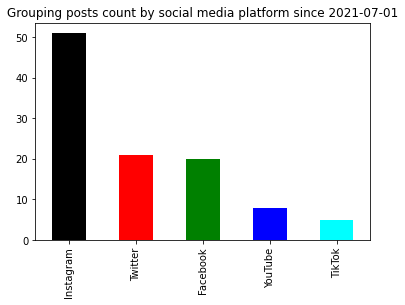

In [7]:
user_input = "2021-07-01"
the_user_target_date = df["Time stamp"]>user_input
new_df = df[the_user_target_date]
new_df["Platform"].value_counts().plot(kind="bar",color=['black', 'red', 'green', 'blue', 'cyan'],title = "Grouping posts count by social media platform since" + " " + user_input)

In [8]:
import matplotlib.pyplot as plt


In [9]:
list = ["Anti-Zionist",
"Antisemitic",
"Non-Antisemitic"]

df = df.loc[df['Category'] .isin(list)]
#This line is keeping rows which have one of the categories


<AxesSubplot:ylabel='Platform'>

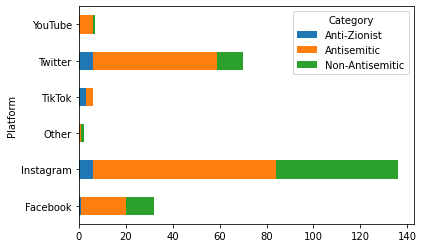

In [10]:

df_group_=df.groupby(['Category', 'Platform'])['Platform'].count().unstack('Category').fillna(0).astype(int)
df_group_.plot(kind='barh', stacked=True,mark_right = True )




In [11]:
#נתונים על הסרת התכנים- לפי סוג תוכן (כמה מכל סוג תוכן הוסרו וכמה נשארו)

In [12]:
category = df["Category"]
df.groupby(['Category']).count()

g= df.groupby(['Category'])["Removed","Removed 1"]

g.count()


,Removed,Removed 1
Category,,
Anti-Zionist,16,14
Antisemitic,159,147
Non-Antisemitic,77,68


In [13]:
removed_1st = df["Removed"]=="V"
removed_2nd = df["Removed 1"]=="V"



In [14]:
s = df.groupby(['Category',"Removed 1"])
s.get_group(("Antisemitic", "X" )).count()

Category                                                                                                                   114
Removed                                                                                                                    114
Removed 1                                                                                                                  114
Time stamp                                                                                                                 114
First name                                                                                                                 114
Last (family) name                                                                                                         114
Platform                                                                                                                   114
Language of the post: if none of these options fit, please choose "Other". Then remember to complete the next q

In [15]:
#אחוזים לפי כל רשת חברתית - כמה תכנים הוסרו מול כמה נשארו


#Key words in removed content (only)

In [16]:
removed_1st = df["Removed"]=="V"
removed_2nd = df["Removed 1"]=="V"

content_description = df["A short summary of the content- write briefly in your own words"]

print(content_description[removed_1st].count())
print(content_description[removed_2nd].count())

22
56


In [17]:
#Tokenization process - 
#1. Translate all words, in any languge - to English
#2. Exclude Stop Words
#3. Lowercasing
#4. Identifaing n-grams
#5. Deal with hashtags
#6. Word frequency - think about how to deal with terms which appear multiple times via the text